<a href="https://colab.research.google.com/github/leandroaguazaco/data_science_portfolio/blob/main/Projects/01-NPS_Analysis/P01_NPS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> NPS ANALYSIS </h1>

The aim of this project is to analyze and evaluate customer service provided by a company based on historical information and customer service usage. The intended result is to provide a perspective or new viewpoint and offer insights for redesigning the customer experience area.

## a - Download and Install libraries

In [ ]:
!pip install pandas
#!pip install datatable
!pip install polars
!pip install xlsx2csv
!pip install tidypolars
!pip install pyjanitor
!pip install missingno

!pip install -U matplotlib
#!pip install matplotlib==3.3
!pip install seaborn
!pip install plotly
!pip install colorama

#!pip install --upgrade pip
#!pip install --upgrade Pillow

!pip install -U --pre pycaret
#!python -m pip uninstall pycaret

!pip install -U scikit-learn
!pip install xgboost

!pip install autoviz
!pip install -U ydata-profiling


In [ ]:
!pip install missingno

## b - Import libraries

In [77]:
# Python Utilies
import pandas as pd # other libraries: datatable , polars, tidypolars
import polars as pl
import numpy as np
import warnings
from janitor import clean_names, remove_empty
from colorama import Fore, Style
from random import sample
import math

# Visualization tools
import matplotlib.pyplot as plt
# from matplotlib import cm
# import matplotlib.colors as mcolors
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# EDA and Autometed EDA
import missingno as msno
from ydata_profiling import ProfileReport
# from autoviz.AutoViz_Class import AutoViz_Class

# Machine learning
import xgboost as xgb
  ## PyCaret
from pycaret.classification import *
from pycaret.regression import *
  ## Sklearn
    ### Imputation
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer
    ### Preporcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
    ### Models
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.linear_model import BayesianRidge

In [68]:
# Setups

%matplotlib inline
plt.style.use("ggplot")
plt.set_cmap('viridis')
pd.options.plotting.backend = "plotly"
# print(plt.style.available)
# plt.style.use("seaborn-v0_8-colorblind")

pio.templates.default = "ggplot2"
#pio.templates

warnings.simplefilter("ignore")

<Figure size 800x550 with 0 Axes>

## c - Load data

In [4]:
# Data set 1
%%time

# To pandas DataFrame format, to clean names, to remove empty columns, set index columnn and drop duplicates.
# Optionals steps under context.

encuesta_indicadores_df  = pl.read_excel(source = "Encuesta_Indicadores.xlsx",
                                         sheet_name = "Sheet1",
                                         xlsx2csv_options = {"skip_empty_lines": True},
                                         read_csv_options ={"has_header": True,
                                                            "try_parse_dates": True, # Important
                                                            "encoding": "utf8"}) \
                            .to_pandas() \
                            .pipe(clean_names) \
                            .pipe(remove_empty) \
                            .set_index("id") \
                            .drop_duplicates()

"""
# Using pandas
encuesta_indicadores_df = pd.read_excel("Encuesta_Indicadores.xlsx",
                                        sheet_name = "Sheet1",
                                        header = 0 ,
                                        index_col = "id")
"""

print(f"{Fore.GREEN} {type(encuesta_indicadores_df)} {Style.RESET_ALL}")
print("\n")
print(f" {Fore.BLUE} DataFrame Encuesta Indicadores: rows = {encuesta_indicadores_df.shape[0]}, columns = {encuesta_indicadores_df.shape[1]} {Style.RESET_ALL}")
print("\n")
print(encuesta_indicadores_df.head().𝚝𝚘_𝚖𝚊𝚛𝚔𝚍𝚘𝚠𝚗())
print("\n")

 <class 'pandas.core.frame.DataFrame'> 


  DataFrame Encuesta Indicadores: rows = 6638, columns = 16 


|   id | fecha_meda          | grupo_meda     |   nps_med | fcr_cat   |   esfuerzo |   satisfaccion_asesor |   satisfaccion_general | tipo_nps    | tipo_ces            | tipo_satu_asesor   | tipo_satu_general   | ticket_status   | problema                    | necesidad              | tipologia                     | id_asesor   |
|-----:|:--------------------|:---------------|----------:|:----------|-----------:|----------------------:|-----------------------:|:------------|:--------------------|:-------------------|:--------------------|:----------------|:----------------------------|:-----------------------|:------------------------------|:------------|
| 3971 | 2021-12-28 00:00:00 | Whatsapp Hogar |         7 | Sí        |          7 |                     8 |                      4 | Neutros     | Ni Fácil ni Difícil | Satisfecho         | Satisfecho          |                 | 

In [5]:
# Data set 2
%%time

# To pandas DataFrame format, to clean names, to remove empty columns, set index columnn and drop duplicates.
# Optionals steps under context.

encuesta_df = pl.read_excel(source = "Encuesta.xlsx",
                            sheet_name = "Sheet1",
                            xlsx2csv_options = {"skip_empty_lines": True},
                            read_csv_options ={"has_header": True,
                                               "try_parse_dates": True, # Important
                                               "encoding": "utf8"}) \
                .to_pandas() \
                .pipe(clean_names) \
                .pipe(remove_empty)  \
                .set_index("id_transaccion") \
                .drop_duplicates()

print(f"{Fore.GREEN} {type(encuesta_df)} {Style.RESET_ALL}")
print("\n")
print(f" {Fore.BLUE} DataFrame Encuesta: rows = {encuesta_df.shape[0]}, columns = {encuesta_df.shape[1]} {Style.RESET_ALL}")
print("\n")
print(encuesta_df.head().to_markdown(tablefmt="grid"))
print("\n")

 <class 'pandas.core.frame.DataFrame'> 


  DataFrame Encuesta: rows = 3719, columns = 2 


+------------------+--------------+------------------------------+
|   id_transaccion | polaridad    | call_center_comentario_ltr   |
+==================+==============+==============================+
|                1 | POSITIVO     | información clara            |
+------------------+--------------+------------------------------+
|                2 | MUY POSITIVO | buena atención y asesoría    |
+------------------+--------------+------------------------------+
|                3 | MUY POSITIVO | buena atencio                |
+------------------+--------------+------------------------------+
|                4 | NEGATIVO     | muy demorado                 |
+------------------+--------------+------------------------------+
|                5 | MUY POSITIVO | buena atención               |
+------------------+--------------+------------------------------+


CPU times: user 137 ms, sys: 1.74 m

## d - Types conversion and reduce memory usage

### d.1 - Function types conversions

In [6]:
# dtypes conversion and memory reduce function.

def dtype_conversion(df, verbose = True):
    """
    Summary:
      Function to dtypes conversion and save reduce memory usage; takes a DataFrame as argument, returns DataFrame.
      For more details, visit: https://towardsdatascience.com/how-to-work-with-million-row-datasets-like-a-pro-76fb5c381cdd.
      The modifications include type casting for numerical and object variables.
    Parameters:
      df (pandas.DataFrame): DataFrame containing information.
      verbose (bool, default = True): If true, display results (conversions and warnings)
    Returns:
      pandas.DataFrame: original DataFrame with dtypes conversions
      Plot original dtypes status, variable warning due high cardinality, save memory usage, final dtypes status.
    """
    # 0- Original dtypes
    print(Fore.GREEN + "Input dtypes" + Style.RESET_ALL)
    print(df.dtypes)
    print("\n")
    print(Fore.RED + "High Cardinality: levels > 15" + Style.RESET_ALL)

    # 1- Original memory_usage in MB
    start_mem = df.memory_usage().sum() / 1024 ** 2

    # 2- Numeric Types
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int": # First 3 characters
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max):
                    df[col] = df[col].astype(np.float16)
                elif (c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    # 3- Categorical Types
    categorical = ["object"]
    for col in df.select_dtypes(exclude = ["int8", "int16", "int32", "int64", "float16", "float32", "float64", "datetime64[ns]"]):
        categories = list(df[col].unique())
        cat_len = len(list(df[col].unique()))
        if cat_len >= 2 and cat_len < 15:
           df[col] = df[col].astype("category")
        else:
          # Print hight cardinality variables, amount of levels and a sample of 50 firts categories
          print(f"Look at: {Fore.RED + col + Style.RESET_ALL}, {cat_len} levels = {categories[:50]}")

    # 4- Final memory_usage in MB
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print("\n")
        print(f"{Fore.BLUE}Initial memory usage: {start_mem:.2f} MB{Style.RESET_ALL}")
        print(f"{Fore.BLUE}Memory usage decreased to {end_mem:.2f} MB ({ 100 * (start_mem - end_mem) / start_mem:.1f}% reduction){Style.RESET_ALL}")
        print("\n")
        print(Fore.GREEN + "Output dtypes" + Style.RESET_ALL)
        print(df.dtypes)
        print("\n")

### d.2 - Applying type conversion function

In [7]:
# Types conversion Dataset 1: Encuenta Indicadores

%%time
dtype_conversion(encuesta_indicadores_df,
                 verbose = True)

Input dtypes
fecha_meda              datetime64[ns]
grupo_meda                      object
nps_med                          int64
fcr_cat                         object
esfuerzo                         int64
satisfaccion_asesor            float64
satisfaccion_general           float64
tipo_nps                        object
tipo_ces                        object
tipo_satu_asesor                object
tipo_satu_general               object
ticket_status                   object
problema                        object
necesidad                       object
tipologia                       object
id_asesor                       object
dtype: object


High Cardinality: levels > 15
Look at: problema, 22 levels = ['Cancelar servicio', 'Solicitudes y PQRs', 'Reconexiones y suspensiones', 'Dudas de factura', 'Inconformidad con cobros', 'Cobros de servicio adicional', 'Fallas en servicio', 'Detalles y cambio en facturación', 'Servicio soporte técnico', 'Modificaciones en servicio', 'Instalación de

In [8]:
# Types conversion Dataset 2: Encuenta

%%time
dtype_conversion(encuesta_df,
                 verbose = True)

Input dtypes
polaridad                     object
call_center_comentario_ltr    object
dtype: object


High Cardinality: levels > 15
Look at: call_center_comentario_ltr, 3533 levels = ['información clara', 'buena atención y asesoría', 'buena atencio', 'muy demorado', 'buena atención', 'excelente', 'soluciono mi problema', 'buen servicio', 'atención buena', 'por la buena atención', 'excelente servicio', 'no me dieron solucion', 'se me dio la solución que necesitaba', 'el servicio', 'me hicieron esperar más de 30 minutos y no me solucionaron nada', 'buenas noches. me dijieron que en 48 me solucionaban lo de mi factura, y no fue así._x000D_\nsigo con el mismo inconveniente.', 'muy buen servicio', 'no es posible comunicarse con ustedes lo dejan en la linea y no dan respuesta  para algo tan elemental para ustedes como la factura', 'exelente', 'buena', 'atención rápida y satisfactoria', 'excelente atención', 'bien', 'es bueno', 'cuando no hay servicio por fallas no descuentan los días en la 

### d.3 - Final Conversions

In [9]:
# Final conversions

# problema, necesidad and tipología variables do not exhibit cardinality problems
encuesta_indicadores_df = encuesta_indicadores_df.astype({"problema": "category",
                                                          "necesidad": "category",
                                                          "tipologia": "category",
                                                          "id_asesor": "category"})

print(Fore.GREEN + "Final dtypes" + Style.RESET_ALL)
print(encuesta_indicadores_df.dtypes)

Final dtypes
fecha_meda              datetime64[ns]
grupo_meda                    category
nps_med                           int8
fcr_cat                       category
esfuerzo                          int8
satisfaccion_asesor            float16
satisfaccion_general           float16
tipo_nps                      category
tipo_ces                      category
tipo_satu_asesor              category
tipo_satu_general             category
ticket_status                 category
problema                      category
necesidad                     category
tipologia                     category
id_asesor                     category
dtype: object


## e - Exploratory Data Analysis

### e.1 - Automated EDA

In [ ]:
# https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html

profile = ProfileReport(encuesta_indicadores_df, # DataFrame
                        title = "Exploratory Data Analysis - Encuesta Indicadores Data",
                        # minimal = True,
                        duplicates = None, # Hight memory consume
                        samples = None, # Not necessary
                        correlations ={"auto": {"calculate": False},
                                       "pearson": {"calculate": True}, # For numerical variales
                                       "spearman": {"calculate": True}, # Form nonnormal numerical variable
                                       "kendall": {"calculate": False},
                                       "phi_k": {"calculate": False},
                                       "cramers": {"calculate": True}} # For categorical to categorical variable: Cramer's V association coefficient, numerical to categorical: Cramer’s V association coefficient with the numerical variable discretized automatically.
                      )

In [ ]:
# Notebook widget from Pandas Profiling to visualize EDA, automated eda library.
profile.to_notebook_iframe()

In [ ]:
# Export automated EDA to html file, look up file in current directory
profile.to_file("EDA_Encuesta_Indicadores.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### e.2 - Manual EDA

#### e.2.1 - Python Built Functions

In [10]:
def summary_stats(df):
  """
  Summary:
    Use python built funcitons to summary a DataFrame.
  Parameters:
    df (pandas.DataFrame): DataFrame.
  Return:
    Shows multiple levels of summary statistics.
  """
  # DataFrame Shape
  print(Fore.GREEN + "DataFrame Shape" + Style.RESET_ALL)
  print(f"Rows = {df.shape[0]}, Columns = {df.shape[1]}")
  print("\n")

  # DataFrame Shape Memory usage
  print(Fore.GREEN + "DataFrame Shape Memory usage" + Style.RESET_ALL)
  print(f"Memory usage = {df.memory_usage().sum() / 1024 ** 2:.2f} MB")
  print("\n")

  # General Information
  print(Fore.GREEN + "General Information" + Style.RESET_ALL)
  print(df.info())
  print("\n")

  # Summary Statistics - Datetime Variables
  print(Fore.GREEN + "Summary Statistics - Datetime Variables" + Style.RESET_ALL)
  print(df.describe(include = ["datetime64[ns]"]).T.to_markdown())
  print("\n")

  # Summary Statistics - Numerical Variables
  print(Fore.GREEN + "Summary Statistics - Numerical Variables" + Style.RESET_ALL)
  print(pd.DataFrame(df.describe(include = ["number"]).T) \
          .merge(pd.DataFrame(df.skew(), columns = ["skewness"]), how = "inner", left_index = True, right_index = True) \
          .merge(pd.DataFrame(df.kurtosis(), columns = ["kurtosis"]), how = "inner", left_index = True, right_index = True) \
          .to_markdown())
  print("\n")

  # Summary Statistics - Categorical Variables
  print(Fore.GREEN + "Summary Statistics - Categorical Variables" + Style.RESET_ALL)
  print(df.describe(exclude = ["number", "datetime64[ns]"]).T.to_markdown())
  print("\n")

summary_stats(encuesta_indicadores_df)

DataFrame Shape
Rows = 6638, Columns = 16


DataFrame Shape Memory usage
Memory usage = 0.23 MB


General Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6638 entries, 3971 to 6493
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha_meda            6638 non-null   datetime64[ns]
 1   grupo_meda            6314 non-null   category      
 2   nps_med               6638 non-null   int8          
 3   fcr_cat               6638 non-null   category      
 4   esfuerzo              6638 non-null   int8          
 5   satisfaccion_asesor   6314 non-null   float16       
 6   satisfaccion_general  6562 non-null   float16       
 7   tipo_nps              6638 non-null   category      
 8   tipo_ces              6638 non-null   category      
 9   tipo_satu_asesor      6314 non-null   category      
 10  tipo_satu_general     6562 non-null   category      
 11  ticket_status

#### e.2.2 - Missing values

In [11]:
# 1. Missing vales plot function - Seaborn engine

def missing_plot_seaborn(df):
  """
  Summary:
    Built function to plot missing values and its proportions from a DataFrame, base on seaborrn engine.

  Parameters:
    df (pandas.DataFrame): DataFrame containing information

  Returns:
    Static barplot: proportion of missing values by variable.
    pandas.DataFrame: total and proportion of missing values by variable.
  """
  # Count missing values per variable
  missing_values_df = pd.DataFrame(data = {"dtype": list(df.dtypes),
                                           "missing_values": df.isnull().sum(),
                                          "proportion_missing": round(df.isnull().mean(), 3)}) \
                        .sort_values(by = "missing_values", ascending = False) \
                        .reset_index()

  # Change columns name
  missing_values_df.columns = ["variable", "dtype", "missing_values", "proportion_missing"]
  missing_values_df = missing_values_df.iloc[list(missing_values_df["missing_values"] > 0), :]

  # Plotting missing values
  sns.barplot(data = missing_values_df,
              x = "proportion_missing",
              y = "variable",
              orient = "h")

  plt.title("Missing Values Proportion")
  plt.xlabel("Proportion")
  plt.ylabel("Variable")
  # plt.set_cmap('viridis') # It doesn't work
  plt.show()

  return print(missing_values_df.to_string())

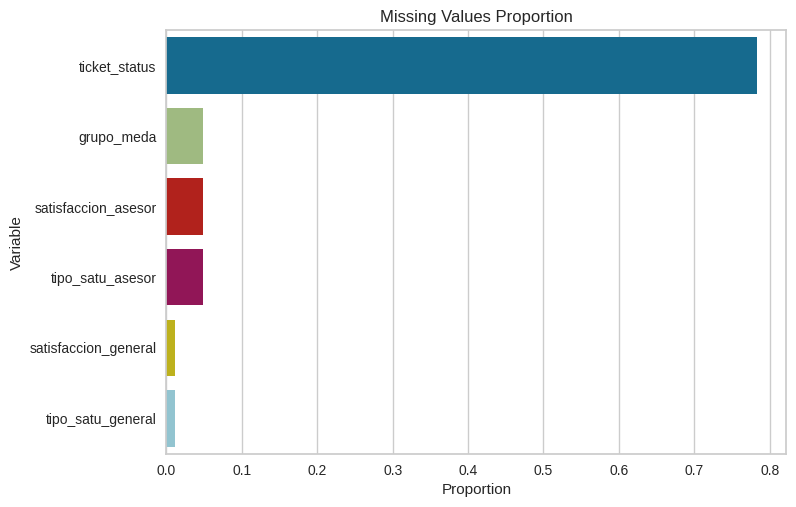

               variable     dtype  missing_values  proportion_missing
0         ticket_status  category            5197               0.783
1            grupo_meda  category             324               0.049
2   satisfaccion_asesor   float16             324               0.049
3      tipo_satu_asesor  category             324               0.049
4  satisfaccion_general   float16              76               0.011
5     tipo_satu_general  category              76               0.011


In [12]:
# Missing values Data set 1:
missing_plot_seaborn(encuesta_indicadores_df)

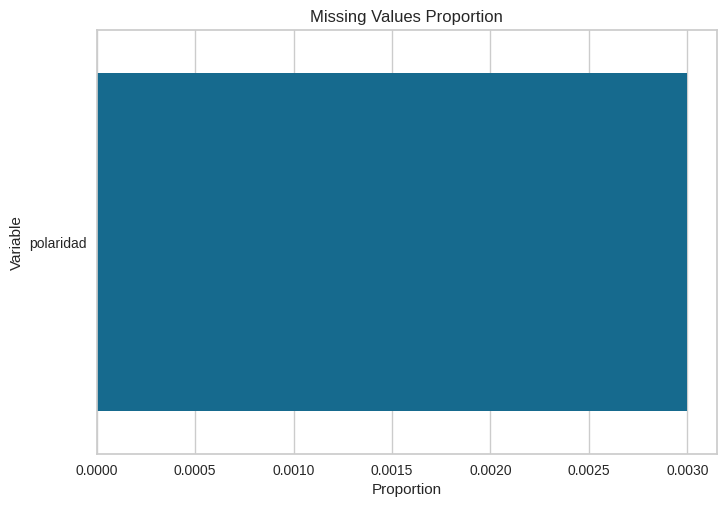

    variable     dtype  missing_values  proportion_missing
0  polaridad  category              13               0.003


In [13]:
# Missing values Data set 2:
missing_plot_seaborn(encuesta_df)

In [15]:
# 1. Missing vales plot function - Plotly engine
def missing_plot_plotly(df):
    """
    Summary:
      Built function to plot missing values and its proportions from a DataFrame, base on plotly engine.

    Parameters:
      df (pandas.DataFrame): DataFrame conteining information

    Returns:
      Interactive barplot: proportion of missing values by variable,
      pandas.Databframe: total and proportion of missing values by variable.
    """
    missing_values_df = pd.DataFrame(data = {"dtype": list(df.dtypes),
                                             "missing_values": df.isnull().sum(),
                                             "proportion_missing": round(df.isnull().mean(), 3)}) \
                          .sort_values(by = "missing_values", ascending = True) \
                          .reset_index()


    # Change columns name
    missing_values_df.columns = ["variable", "dtype", "missing_values", "proportion_missing"]
    missing_values_df = missing_values_df.iloc[list(missing_values_df["missing_values"] > 0), :]

    fig = px.bar(data_frame = missing_values_df,
                y = "variable",
                x = "proportion_missing",
                color_discrete_sequence = px.colors.sequential.Viridis,

                # color = sample(px.colors.sequential.Viridis, missing_values_df.shape[0]),
                # color_discrete_map = "identity",
                # color_discrete_sequence = cm.get_cmap('viridis', 6)
                # color_continuous_scale =  px.colors.sequential.Viridis,
                # text_auto = True,

                orientation = 'h',
                width = 900,
                height = 500)

    fig.update_layout(title = {'text': "Missing Values Proportion",
                              'y': 0.95,
                              'x': 0.5,
                              'xanchor': 'center',
                              'yanchor': 'top'},
                      xaxis_title = "Proportion",
                      yaxis_title = "Variable")

    """
    fig.update_layout(legend_title = "Proportion",
                      showlegend = False)
    """

    fig.update_traces(marker_line_color = 'black')
    fig.show()

    return print(missing_values_df.sort_values(by = "missing_values", ascending = False).to_markdown())

In [16]:
# Missing values Data set 1:
missing_plot_plotly(encuesta_indicadores_df)

|    | variable             | dtype    |   missing_values |   proportion_missing |
|---:|:---------------------|:---------|-----------------:|---------------------:|
| 15 | ticket_status        | category |             5197 |                0.783 |
| 12 | grupo_meda           | category |              324 |                0.049 |
| 13 | satisfaccion_asesor  | float16  |              324 |                0.049 |
| 14 | tipo_satu_asesor     | category |              324 |                0.049 |
| 10 | satisfaccion_general | float16  |               76 |                0.011 |
| 11 | tipo_satu_general    | category |               76 |                0.011 |


In [17]:
# Missing values Data set 2:
missing_plot_plotly(encuesta_df)

|    | variable   | dtype    |   missing_values |   proportion_missing |
|---:|:-----------|:---------|-----------------:|---------------------:|
|  1 | polaridad  | category |               13 |                0.003 |


<Axes: >

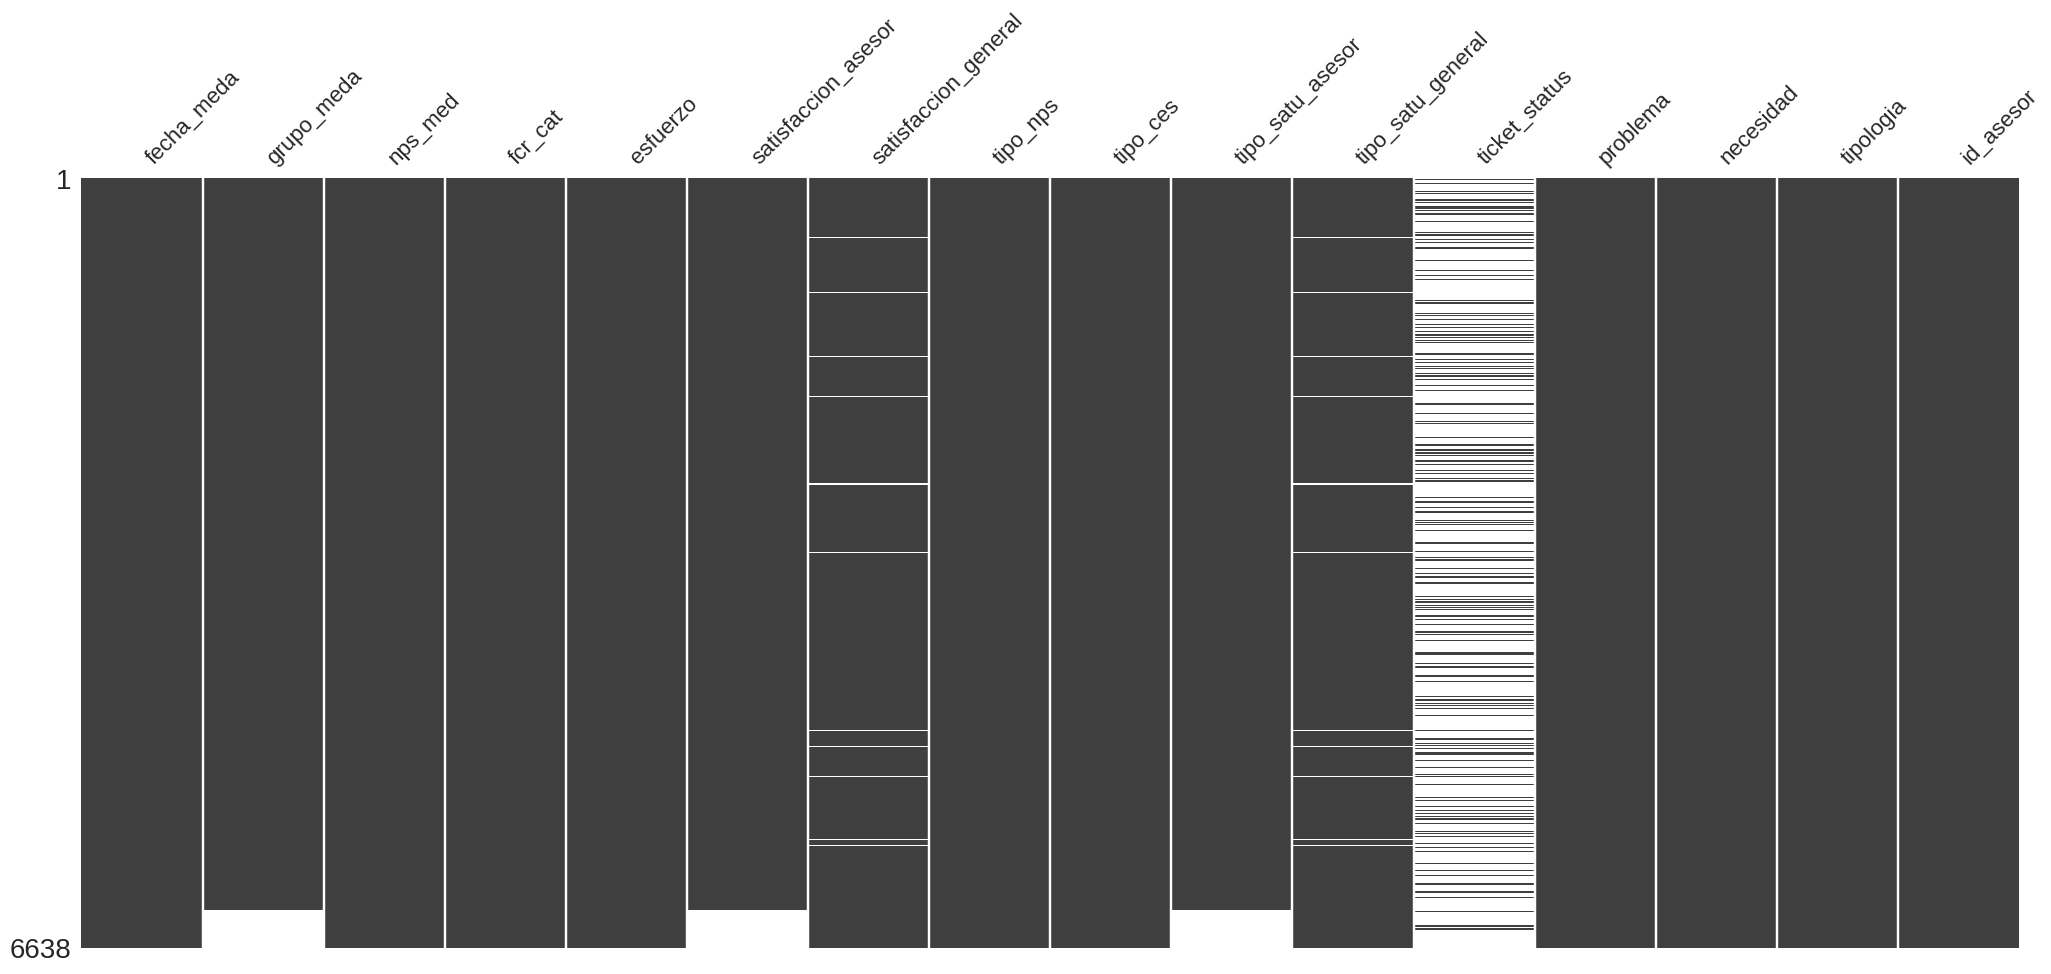

In [18]:
# Pick out patterns in data completion.
msno.matrix(encuesta_indicadores_df.sort_values(by = "satisfaccion_asesor"),
            sparkline =  False)

At a glance, fecha_meda, nps_med, fcr_cat, esfuerzo, tipo_nps, tipo_ces, problema, tipologia and id_asesor appear to be completely populated, while geographic satisfaccion_general, tipo_status_general seems mostly complete, but spottier.The variable with the higher proportion of missing values is ticket_status (78.3%).

<Axes: >

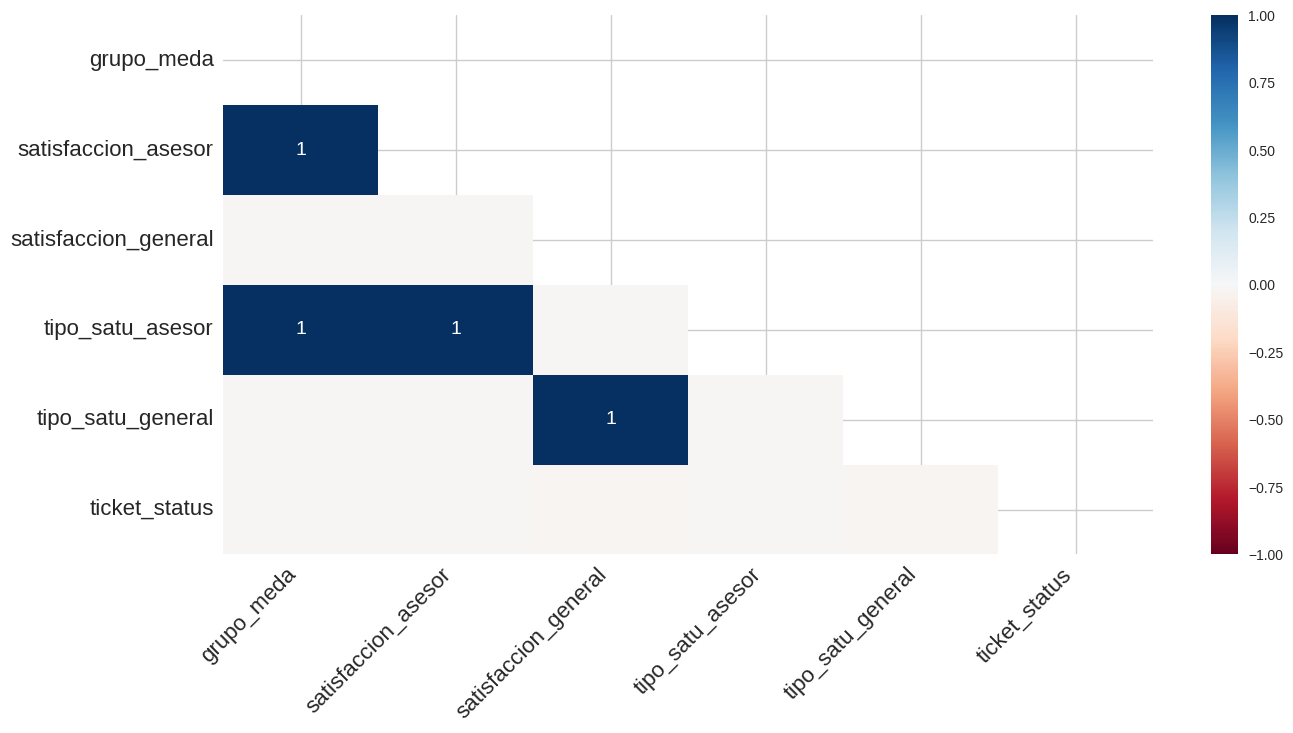

In [19]:
# Missing values correlation heatmap

# Measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
msno.heatmap(encuesta_indicadores_df,
             figsize = (15, 7))

<Axes: >

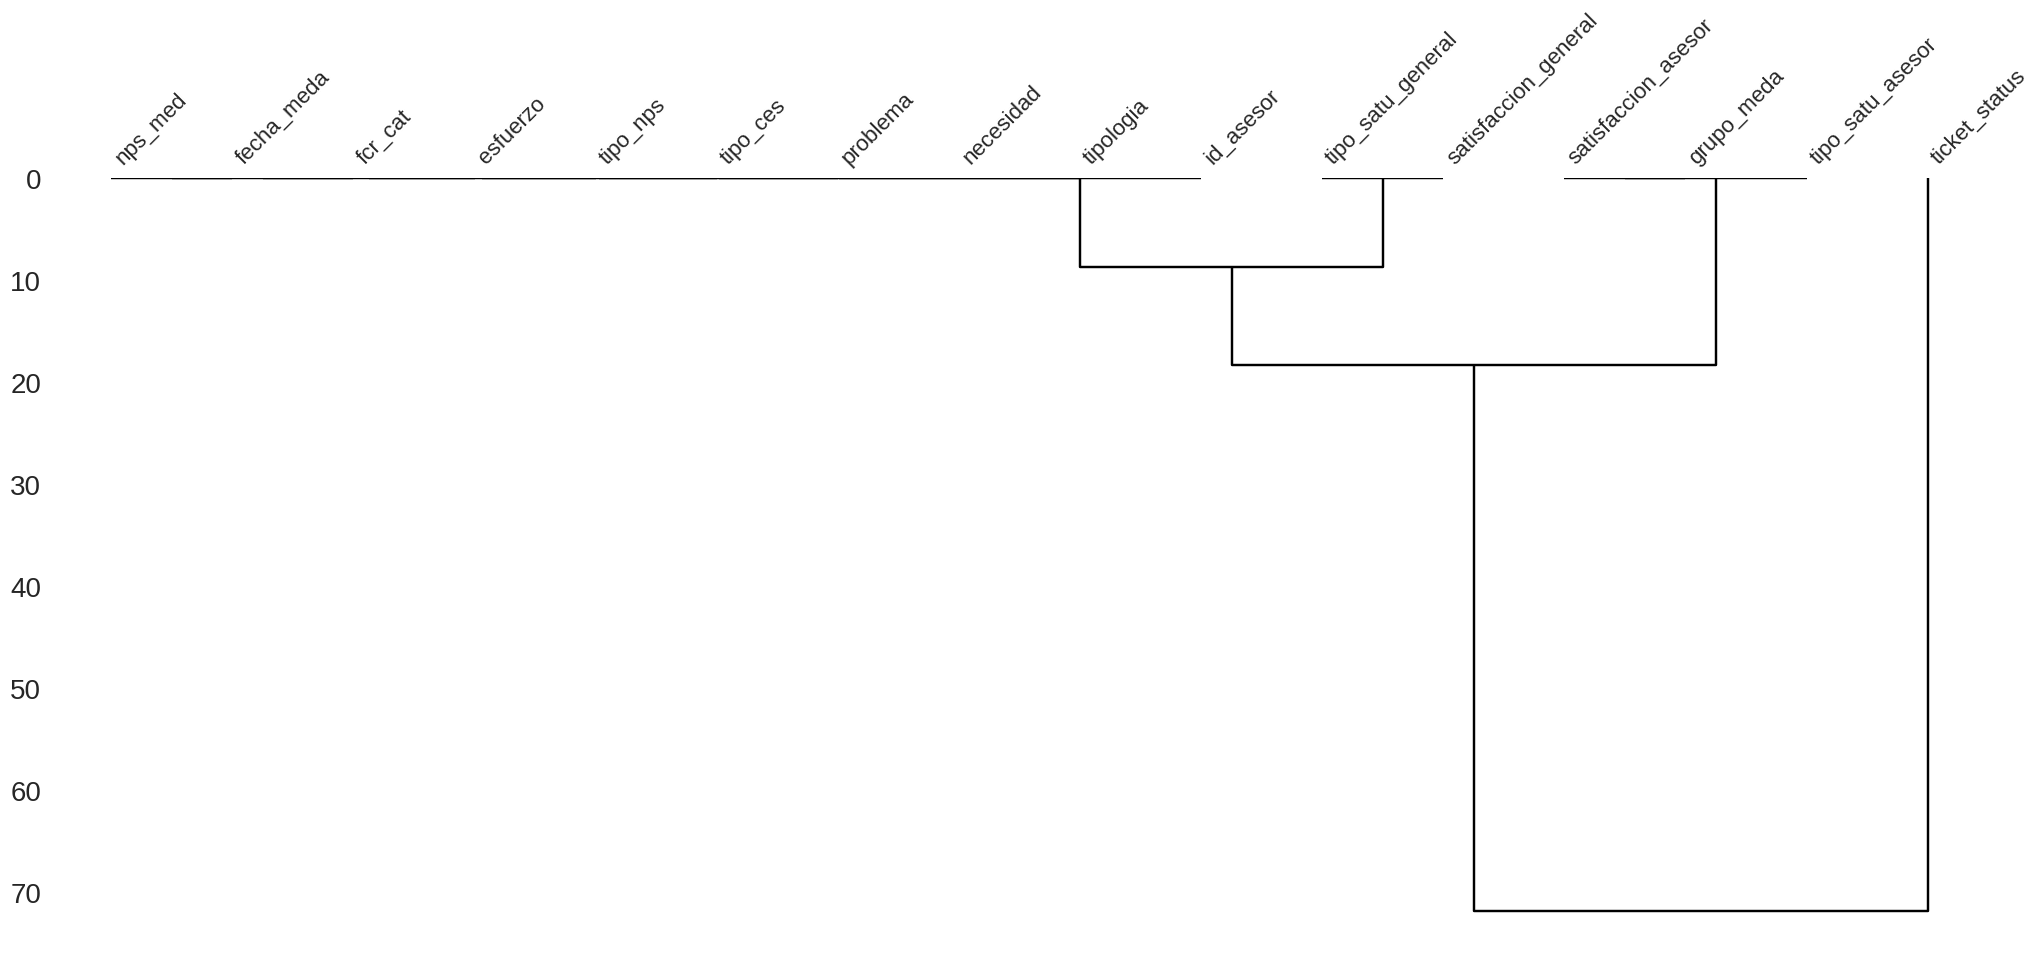

In [20]:
# Dendograma of missing values relations

# Allows a more fully correlate variable completion.
# Using a hierarchical clustering algorithm to bin variables against one another by their nullity correlation.
# More detalis: https://github.com/ResidentMario/missingno
msno.dendrogram(encuesta_indicadores_df)

##### Missing values conclusions

**1 - Missingness types and variables**

* Missing completly at random (**MCAR**): ticket_status.

* Missing at random (**MAR**): none.

* Missing not at random (**MNAR**): <font color='blue'>tipo_satu_general - satisfaccion_general</font> and <font color='green'>satisfaccion_asesor - grupo_meda - tipo_satu_asesor</font>

**2 - Missing values processing**

* Dispense with ticket variable, i.e. delete variable.
* Impute the other variables.


In [24]:
# Isolate and compare missing and complete values aside
# Delete variables: ticket_status

def num_summary_stat(df):
  """
  Summary:
  Parameters:
  Returns:
  """
  print(pd.DataFrame(df.describe(include = ["number"]).T) \
          .merge(pd.DataFrame(df.skew(), columns = ["skewness"]), how = "inner", left_index = True, right_index = True) \
          .merge(pd.DataFrame(df.kurtosis(), columns = ["kurtosis"]), how = "inner", left_index = True, right_index = True) \
          .to_markdown())

# Original DataFrame, complete information
complete = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# DaFrame dropping NAs
no_missing = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).dropna()

# Summary Statistics - Numerical Variables
print(Fore.GREEN + "Original DF vs Without Missing Values DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
print("\n")
num_summary_stat(no_missing)
print("\n")

# Summary Statistics - Categorical Variables
print(Fore.GREEN + "Without Missing Values and Complete - Categorical Variables" + Style.RESET_ALL)
print(complete.describe(exclude = ["number", "datetime64[ns]"]).T.to_string())
print("\n")
print(no_missing.describe(exclude = ["number", "datetime64[ns]"]).T.to_string())

Original DF vs Without Missing Values DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |


|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|--

##### Impute missing values

* KNN imputer form numerical data.
* Multivariate feature imputation.

In [25]:
# KNN imputer for numerical data
# complete[complete.isnull()] = np.nan
complete_imputed = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# k-Nearest Neighbors imputer
knn_imputer = KNNImputer(missing_values = np.nan,
                         n_neighbors = 5,
                         # add_indicator=True
                         weights = 'distance')

# Fit to data, then transform it
complete_imputed[complete_imputed.select_dtypes(include = "number").columns] = knn_imputer.fit_transform(complete_imputed[complete_imputed.select_dtypes(include = "number").columns])

# Compare with summary statictics from the original dataset
print(Fore.GREEN + "Original DF vs KNN Imputed DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
num_summary_stat(complete_imputed)

Original DF vs KNN Imputed DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-------

In [26]:
# Multivariate feature imputation form numerical data
# complete[complete.isnull()] = np.nan
complete_imputed = encuesta_indicadores_df.drop(["ticket_status"], axis = 1).copy(deep = True)

# RandomForest multivariate feature imputer
rf_imputer = IterativeImputer(estimator = RandomForestClassifier(),
                              max_iter = 5,
                              random_state = 123456)

# Fit to data, then transform it
complete_imputed[complete_imputed.select_dtypes(include = "number").columns] = rf_imputer.fit_transform(complete_imputed[complete_imputed.select_dtypes(include = "number").columns])

# Compare with summary statictics from the original dataset
print(Fore.GREEN + "Original DF vs RandomForest Imputed DF - Numerical Variables" + Style.RESET_ALL)
num_summary_stat(complete)
num_summary_stat(complete_imputed)

Original DF vs RandomForest Imputed DF - Numerical Variables
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
| nps_med              |    6638 | 7.21754 | 3.64666 |     0 |     5 |     9 |    10 |    10 |   -1.10716 |  -0.353297 |
| esfuerzo             |    6638 | 6.97951 | 3.73802 |     0 |     5 |     9 |    10 |    10 |   -0.9623  |  -0.671407 |
| satisfaccion_asesor  |    6314 | 7.32031 | 3.74219 |     0 |     6 |     9 |    10 |    10 |   -1.16113 |  -0.321777 |
| satisfaccion_general |    6562 | 3.89258 | 1.51465 |     1 |     3 |     5 |     5 |     5 |   -1.08594 |  -0.42749  |
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|:---------------------|--------:|--------:|--------:|------:|------:|------:|------:|------

#### e.2.3 Numerical Distributions


In [75]:
def distrib_plots_seaborn(df, cat = None):
  """
  Summary:
    Function to create grouped plots of distributions based on histograms, using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): Dataset in pandas format.
    cat (string, default = None): Huening histograms by categorical variable.
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(include = "number").columns)
  number_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(len(list(df.select_dtypes(include = "number").columns)) / 2)

  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 2

  # 3. Create a figure and a set of subplots
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols)
  axs = axs.flatten()

  # 4. Group by other variable
  if cat == None:
    kde_aux = True
  else:
    kde_aux = False

  # 5. Create plots
  for i, var in enumerate(vars):
    sns.histplot(data = df,
                 x = var,
                 hue = cat,
                 stat = "frequency",
                 ax = axs[i],
                 kde = kde_aux)
    axs[i].set_xlabel(var)

  fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

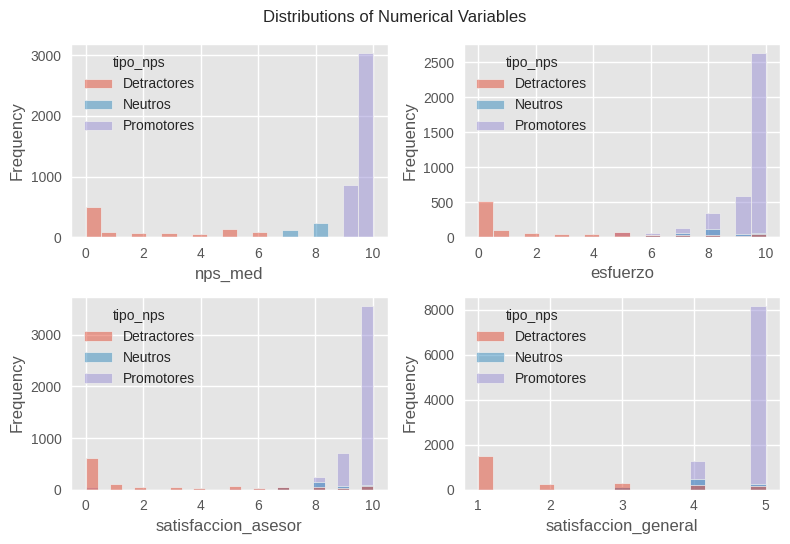

In [76]:
distrib_plots_seaborn(encuesta_indicadores_df, cat = "tipo_nps")

#### e.2.4 Categorical Distributions

In [82]:
def bar_plots_seaborn(df, cat = None):
  """
  Summary:
    Function to create grouped plots of distributions based on histograms, using the seaborn plotting engine.
  Parameters:
    df (pandas.DataFrame): Dataset in pandas format.
    cat (string, default = None): Huening histograms by categorical variable.
  Returns:
    Grouped plots of histograms.
  """

  # 0. Numerical variables
  vars = list(df.select_dtypes(exclude = ["number", "datetime64[ns]"]).columns)
  numb_var = len(vars)

  # 1. Number of rows in plot matrix
  rows = math.ceil(len(list(df.select_dtypes(exclude = ["number", "datetime64[ns]"]).columns)) / 3)
  # 2. Number of columns in plot matrix, by default 2 columns
  cols = 3
  # 3. Create a figure and a set of subplots
  fig, axs = plt.subplots(nrows = rows,
                          ncols = cols,
                          figsize = (12, 25)
                          )
  axs = axs.flatten()

  # 4. Group by other variable
  if cat == None:
    kde_aux = True
  else:
    kde_aux = False

  # 5. Create plots
  for i, var in enumerate(vars):
    sns.countplot(data = df,
                  x = var,
                  hue = cat,
                  ax = axs[i],
                  dodge = False)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    axs[i].set_ylabel("Frequency")
  #fig.suptitle('Distributions of Numerical Variables')
  fig.tight_layout() # To enhance visualization

  plt.show()

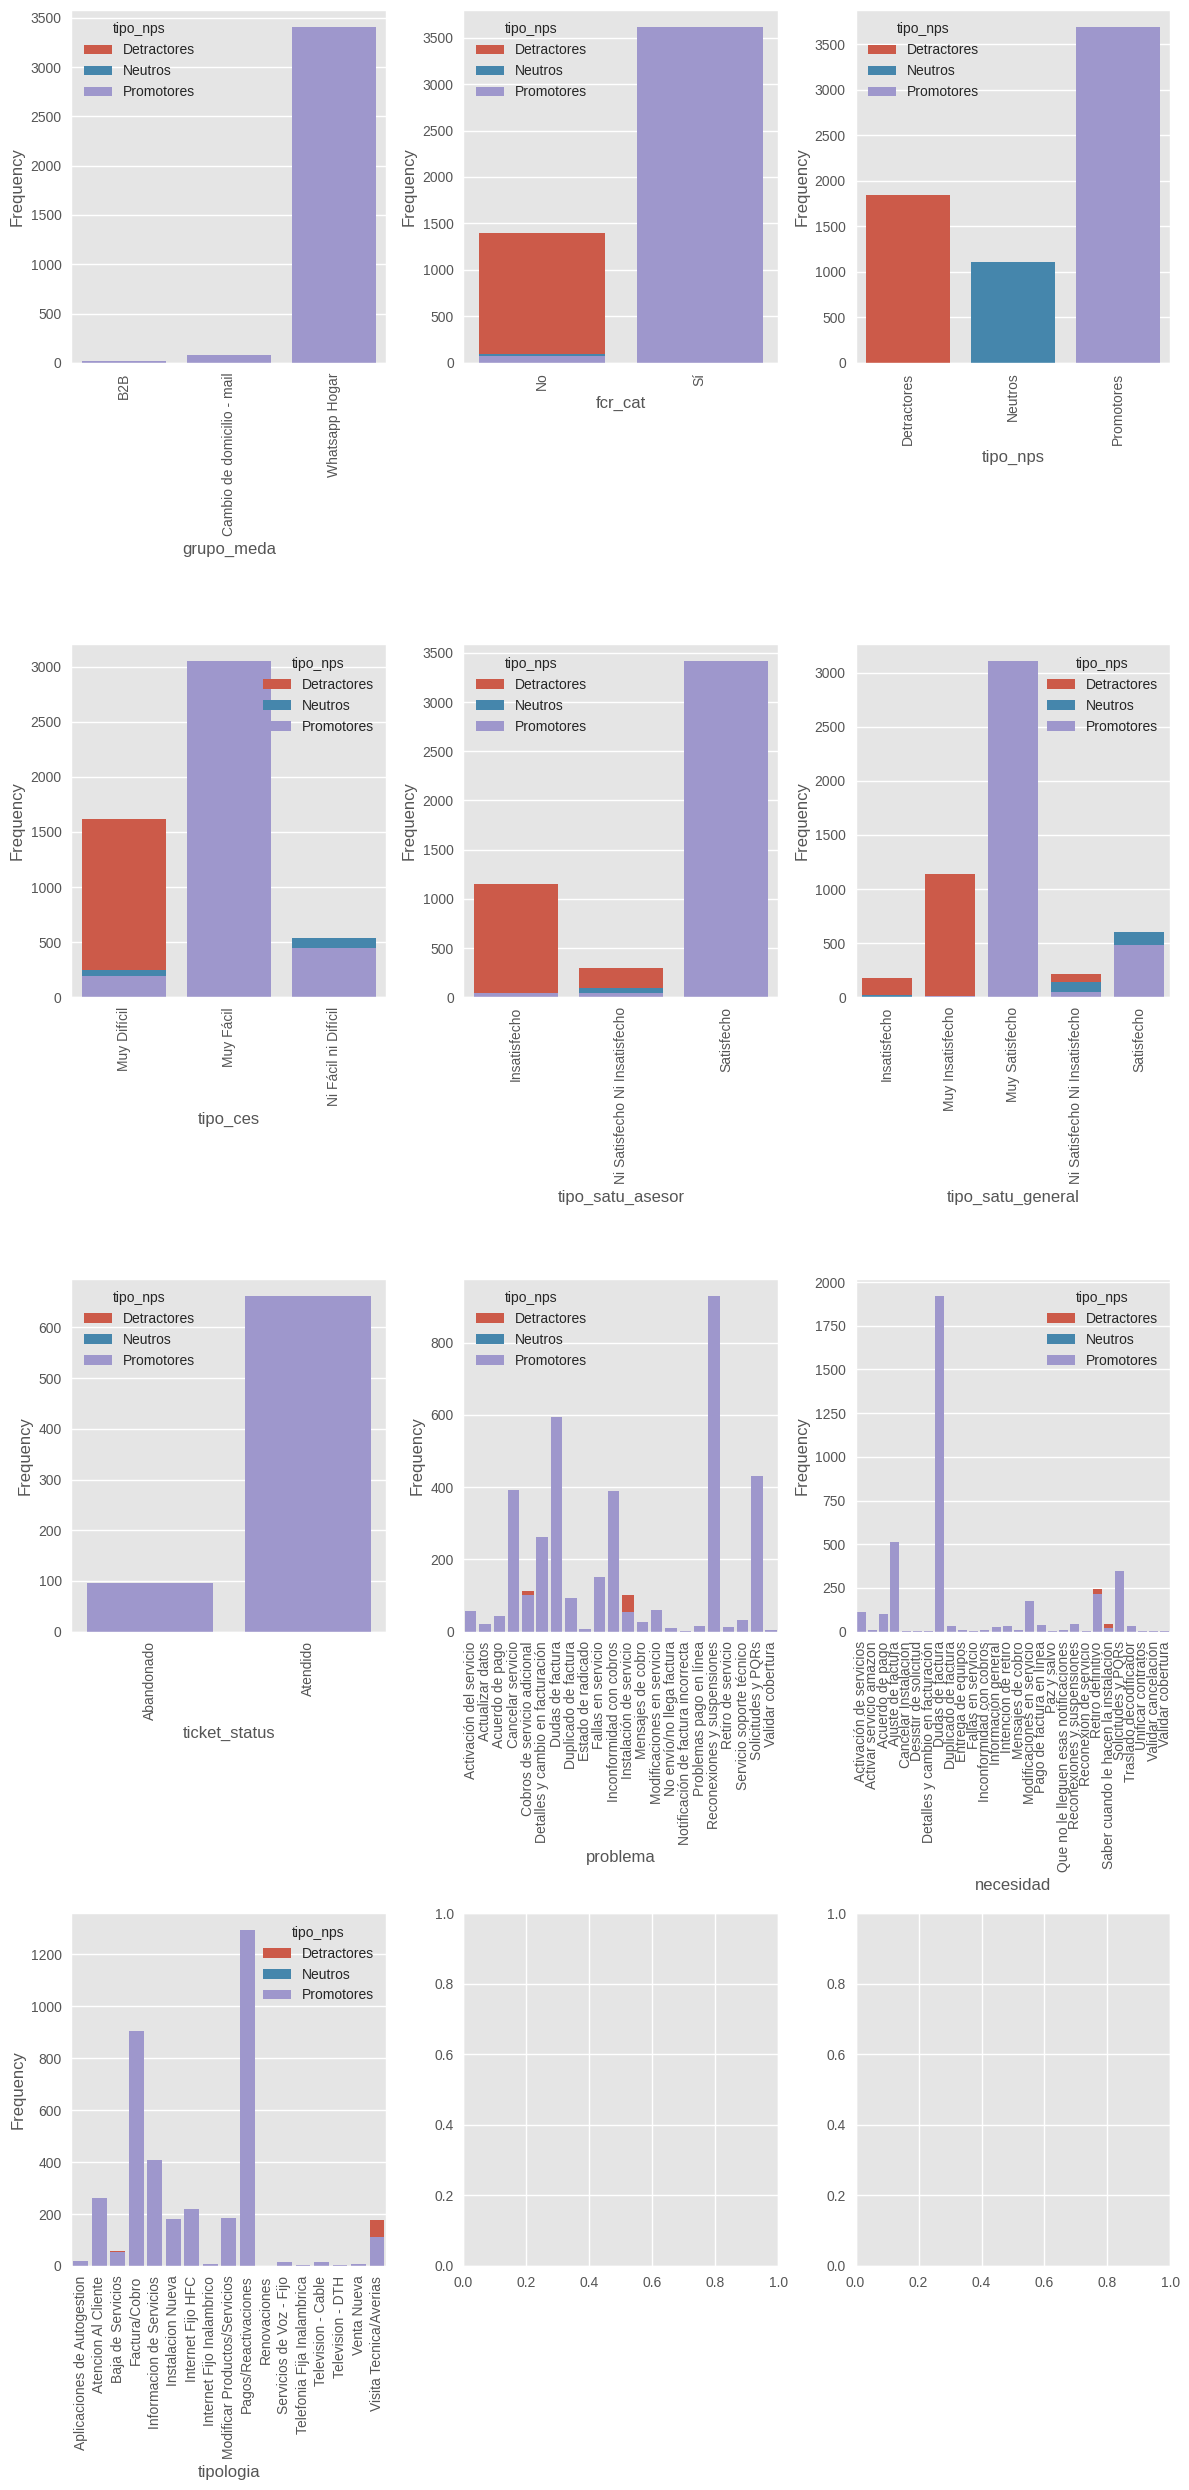

In [83]:
bar_plots_seaborn(encuesta_indicadores_df.drop(["id_asesor"], axis = 1), cat = "tipo_nps")

## Punto 1


Entender el contacto del cliente. Realice un análisis descriptivo detallado de las variables, tenga en cuenta realizar análisis de correlación y pruebas de hipótesis si considera necesario.

In [ ]:
# Visualización inicial
encuesta_indicadores_df.head()

In [ ]:
# Información general en cuanto tipos y cantidad de datos
encuesta_indicadores_df.info()

# Dimensionalidad
print(encuesta_indicadores_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha_Meda            6640 non-null   object 
 1   grupo_meda            6316 non-null   object 
 2   nps_med               6640 non-null   int64  
 3   fcr_cat               6640 non-null   object 
 4   Esfuerzo              6640 non-null   int64  
 5   Satisfaccion_asesor   6316 non-null   float64
 6   Satisfacción_general  6564 non-null   float64
 7   Tipo_NPS              6640 non-null   object 
 8   Tipo_CES              6640 non-null   object 
 9   Tipo_SATU_asesor      6316 non-null   object 
 10  Tipo_SATU_general     6564 non-null   object 
 11  Ticket Status         1441 non-null   object 
 12  Problema              6640 non-null   object 
 13  Necesidad             6640 non-null   object 
 14  tipologia             6640 non-null   object 
 15  id                   

En la base de datos *Encuenta_Indicadores" se presentan 6640 registros y 17 campos, 5 variables numéricas, una variable de fecha, 9 variables categóricas y campos de identificadores únicos.

In [ ]:
# Descripción de variables numéricas
encuesta_indicadores_df.describe().T

,count,mean,std,min,25%,50%,75%,max
nps_med,6640.0,7.218373,3.646434,0.0,5.00,9.0,10.00,10.0
Esfuerzo,6640.0,6.980422,3.737820,0.0,5.00,9.0,10.00,10.0
Satisfaccion_asesor,6316.0,7.318239,3.741199,0.0,6.00,9.0,10.00,10.0
Satisfacción_general,6564.0,3.892748,1.515248,1.0,3.00,5.0,5.00,5.0
id,6640.0,3320.500000,1916.947226,1.0,1660.75,3320.5,4980.25,6640.0


Se denota los siguientes puntos:
* El 50% de clientes otorgaron a los servicios un NPS de 9.
* El 50% de clientes denotaron un esfuerzo de 9, lo cual es un indicar desfavorble para la compañía. el indicador posee una esfuerzo medio de 7.


In [ ]:
# Descripción de variables categóricas
encuesta_indicadores_df.describe(include = "object").T

,count,unique,top,freq
Fecha_Meda,6640,180,2021-12-27,141
grupo_meda,6316,3,Whatsapp Hogar,6143
fcr_cat,6640,2,Sí,5083
Tipo_NPS,6640,3,Promotores,3691
Tipo_CES,6640,3,Muy Fácil,3485
Tipo_SATU_asesor,6316,3,Satisfecho,4662
Tipo_SATU_general,6564,5,Muy Satisfecho,3561
Ticket Status,1441,2,Atendido,1264
Problema,6640,22,Reconexiones y suspensiones,1476
Necesidad,6640,28,Dudas de factura,3087


Se denota como la compañía presenta una mayor cantidad de promotores, por su parte el tipo de esfuerzo *Tipo_CES* con mayor participación es el _Muy Fácil_. Aproximadamente el 50% de clientes han sido calificados como __Satisfecho__ con su asesor, el estatus general predominancia es el __Muy Satisfecho__.

In [ ]:
# Distribución de variables numéricas

numericas = encuesta_indicadores_df.select_dtypes(exclude = "object").columns
numericas = list(numericas)

['nps_med', 'Esfuerzo', 'Satisfaccion_asesor', 'Satisfacción_general', 'id']

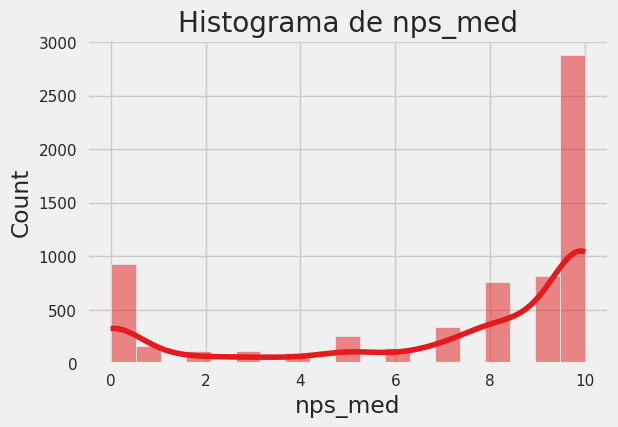

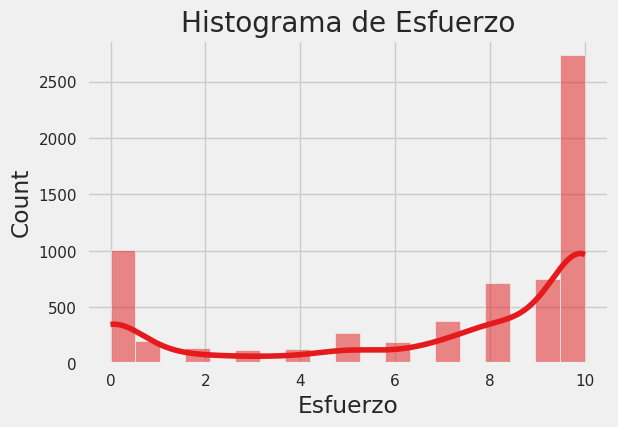

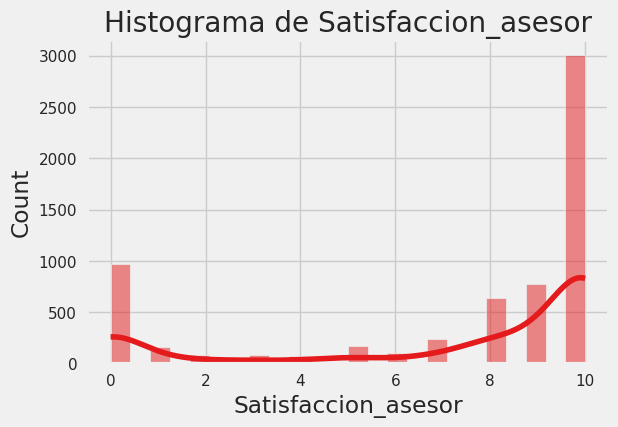

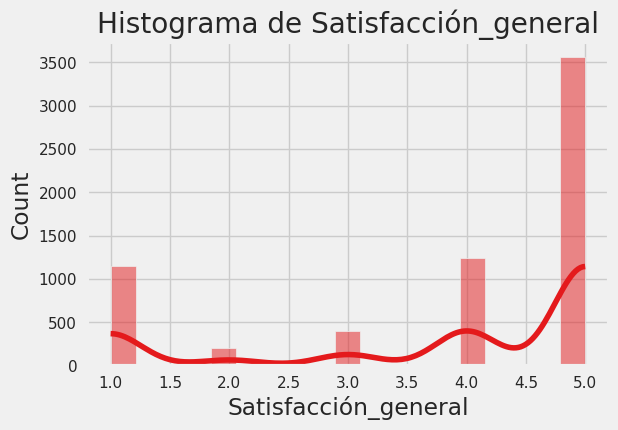

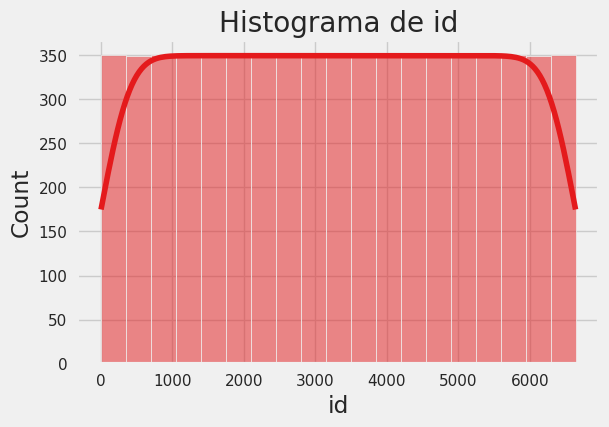

In [ ]:
for campo in numericas:
  plt.figure(figsize = (6, 4))
  sns.histplot(encuesta_indicadores_df[campo], kde = True)
  plt.title(f"Histograma de {campo}")
  plt.show()

In [ ]:
# Correlación
sns.pairplot(encuesta_indicadores_df[numericas])
plt.show()

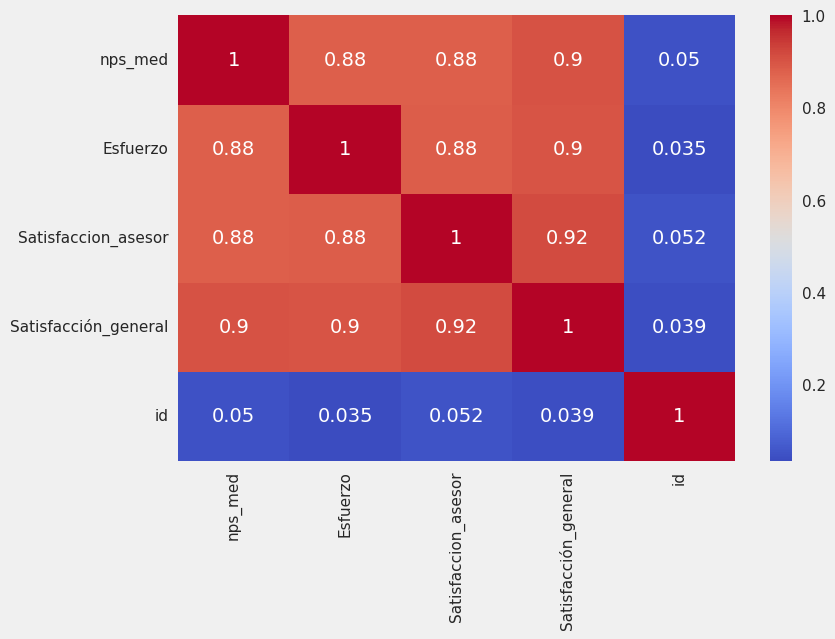

In [ ]:
sns.heatmap(encuesta_indicadores_df[numericas].corr(), annot=True, cmap = "coolwarm")
plt.show()

Se observa como todas las variables cuentan con una correlación positiva fuerte. Lo anterior indica que el modificar cualquier variable implica la modificación de las demás.

## Punto 2

(10%) ¿Qué tiene para decir sobre el desempeño de los asesores, ¿cuáles son los mejores y por qué?

En terminos generales, la satisfaccción de los clientes con su asesor es sobresaliente, un total de de 4662 (70%) clientes quedaron safisfechos con el servicio que se les brindó.

In [ ]:
# En terminos generales, acontinuación se presenta el ranking de los 10 mejores asesores con base en la cantidad de clientes que calificaron su servicio como Satisfactorio, respecto al total de servicios realizados
encuesta_indicadores_df[encuesta_indicadores_df["Tipo_SATU_asesor"] == "Satisfecho"].groupby("id_asesor")["Tipo_SATU_asesor"].value_counts().sort_values(ascending = False).head(10)


id_asesor   Tipo_SATU_asesor
Asesor_13   Satisfecho          118
Asesor_204  Satisfecho          108
Asesor_170  Satisfecho          100
Asesor_17   Satisfecho           99
Asesor_10   Satisfecho           96
Asesor_22   Satisfecho           94
Asesor_121  Satisfecho           78
Asesor_77   Satisfecho           76
Asesor_135  Satisfecho           76
Asesor_49   Satisfecho           75
Name: Tipo_SATU_asesor, dtype: int64

## Punto 3


(30%) Utilizando al menos dos modelos supervisados, prediga la variable Tipo_NPS que se encuentra en la base de datos Encuesta_Indicadores.

In [ ]:
# Con el fin de seleccionar los modelos que se ajusten a los datos, se emplea la librería PyCaret

s = setup(data = encuesta_indicadores_df,
          target = 'Tipo_NPS',
          #imputation_type = 'iterative',
          remove_outliers = True,
          remove_multicollinearity = True,
          #numeric_imputation = 'median',
          #feature_selection = True,
          #feature_selection_threshold = 0.8,
          #feature_selection_method = 'classic',
          normalize = True)

,Description,Value
0,Session id,1974
1,Target,Tipo_NPS
2,Target type,Multiclass
3,Target mapping,"Detractores: 0, Neutros: 1, Promotores: 2"
4,Original data shape,"(6640, 17)"
5,Transformed data shape,"(6407, 63)"
6,Transformed train set shape,"(4415, 63)"
7,Transformed test set shape,"(1992, 63)"
8,Ordinal features,2
9,Numeric features,5


In [ ]:
# Comparación de modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9640
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2990
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.2780
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8480
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0140
rf,Random Forest Classifier,0.9933,0.9999,0.9933,0.9935,0.9934,0.9886,0.9887,1.7270
lr,Logistic Regression,0.9918,0.9997,0.9918,0.9920,0.9918,0.9861,0.9861,2.4370
et,Extra Trees Classifier,0.9727,0.9984,0.9727,0.9726,0.9725,0.9533,0.9534,1.4940
svm,SVM - Linear Kernel,0.9703,0.0000,0.9703,0.9707,0.9702,0.9493,0.9495,0.6280
lda,Linear Discriminant Analysis,0.9249,0.9917,0.9249,0.9307,0.9266,0.8723,0.8733,0.7400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Los resultados anteriores demuestran que modelos de emsamble se ajustan al conjunto de datos, con lo anterior se seleccionan los modelos de Arbol de decision y XGBoost.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=1974, splitter='best')


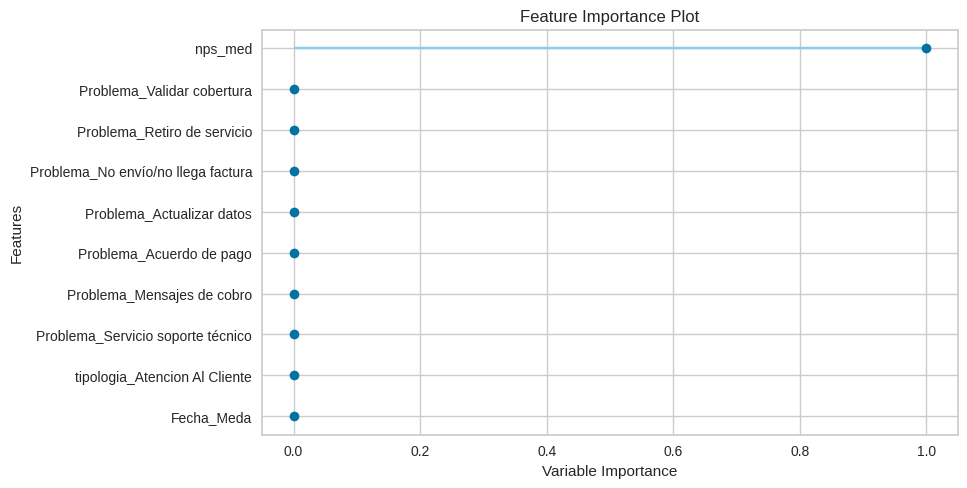

In [ ]:
print(best)
plot_model(best, plot = 'feature')

In [ ]:
# Tunear el mejor model
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Usando Arboles de decision para predecir los datos de testeo
#predict_model(tuned_model)
predictions = predict_model(best,
                            data = X_train)
predictions.head(100)

,Fecha_Meda,grupo_meda,nps_med,fcr_cat,Esfuerzo,Satisfaccion_asesor,Satisfacción_general,Tipo_CES,Tipo_SATU_asesor,Tipo_SATU_general,Ticket Status,Problema,Necesidad,tipologia,id,id_asesor,prediction_label,prediction_score
5080,2021-12-06,Whatsapp Hogar,5,Sí,8,10.0,5.0,Ni Fácil ni Difícil,Satisfecho,Muy Satisfecho,NaN,Detalles y cambio en facturación,Dudas de factura,Pagos/Reactivaciones,2737,Asesor_155,Detractores,1.0
517,2022-03-27,NaN,6,No,7,NaN,3.0,Ni Fácil ni Difícil,NaN,Ni Satisfecho Ni Insatisfecho,NaN,Fallas en servicio,Dudas de factura,Internet Fijo HFC,6431,Asesor_13,Detractores,1.0
5788,2021-11-13,Whatsapp Hogar,0,No,0,0.0,1.0,Muy Difícil,Insatisfecho,Muy Insatisfecho,NaN,Instalación de servicio,Información general,Instalacion Nueva,1817,Asesor_177,Detractores,1.0
4460,2021-12-20,Whatsapp Hogar,1,Sí,9,7.0,4.0,Muy Fácil,Satisfecho,Satisfecho,NaN,Fallas en servicio,Acuerdo de pago,Factura/Cobro,3473,Asesor_129,Detractores,1.0
452,2022-03-05,Whatsapp Hogar,10,Sí,10,10.0,5.0,Muy Fácil,Satisfecho,Muy Satisfecho,NaN,Reconexiones y suspensiones,Dudas de factura,Pagos/Reactivaciones,5843,Asesor_10,Promotores,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,2021-12-23,Whatsapp Hogar,9,Sí,8,9.0,4.0,Ni Fácil ni Difícil,Satisfecho,Satisfecho,NaN,Cancelar servicio,Traslado decodificador,Pagos/Reactivaciones,3658,Asesor_196,Promotores,1.0
4520,2021-10-16,Whatsapp Hogar,0,No,0,0.0,1.0,Muy Difícil,Insatisfecho,Muy Insatisfecho,NaN,Inconformidad con cobros,Ajuste de factura,Factura/Cobro,793,Asesor_131,Detractores,1.0
1221,2021-11-01,Whatsapp Hogar,0,No,0,0.0,1.0,Muy Difícil,Insatisfecho,Muy Insatisfecho,NaN,Cancelar servicio,Retiro definitivo,Internet Fijo HFC,1354,Asesor_25,Detractores,1.0
4818,2022-01-23,Whatsapp Hogar,10,Sí,8,6.0,4.0,Ni Fácil ni Difícil,Ni Satisfecho Ni Insatisfecho,Satisfecho,NaN,Reconexiones y suspensiones,Dudas de factura,Visita Tecnica/Averias,4362,Asesor_142,Promotores,1.0


### XGBoost


In [ ]:
# Predictores (X), objetivo (y)
X = encuesta_indicadores_df.drop(["Tipo_NPS"], axis = 1)
y =  encuesta_indicadores_df.loc[:, "Tipo_NPS"]

# Train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 123)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
le.classes_

array(['Detractores', 'Neutros', 'Promotores'], dtype=object)

In [ ]:
y_train = pd.DataFrame(y_train_encoded, columns = ["Tipo_NPS"] )
y_train.head()

,Tipo_NPS
0,0
1,0
2,0
3,0
4,2


In [ ]:
xg_cl = xgb.XGBClassifier(n_estimators = 10, seed = 123)

In [ ]:
xg_cl.fit(X_train, y_train)

ValueError: ignored